# Plot transmon-transmon CR effect

In [70]:
import numpy as np
import time
import scipy.interpolate
import matplotlib.pyplot as plt
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [6]:
with open("data_cr_transmon_transmon/data_cr_strong_drive.txt") as file_data:
    result = json.load(file_data)

In [115]:
def plot_cr_effect(
    result,
    plot_setup={'fs': 20, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    color_map = 'seismic'
    n_points = len(result)
    freq = np.zeros(n_points)
    eps = np.zeros(n_points)
    cr = np.zeros(n_points)
    for k in range(0, n_points):
        freq[k] = result[k]["freq"]
        eps[k] = result[k]["eps"]
        cr[k] = np.abs(result[k]["cr"])
    freq_vec, eps_vec = np.linspace(freq.min(), \
        freq.max(), n_points), np.linspace(eps.min(), eps.max(), n_points)
    freq_vec, eps_vec = np.meshgrid(freq_vec, eps_vec)
    # Interpolate
    rbf_func = scipy.interpolate.Rbf(freq, eps, cr, function='linear')
    cr_rbf = rbf_func(freq_vec, eps_vec)
    
    aspect = (np.max(freq_vec) - np.min(freq_vec))/(np.max(eps_vec) - np.min(eps_vec))
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cr_rbf, vmin=np.min(cr_rbf), vmax=np.max(cr_rbf), 
                   origin='lower', extent=[np.min(freq_vec), np.max(freq_vec), 
                   np.min(eps_vec), np.max(eps_vec)], 
                   cmap=color_map, aspect=aspect)
    ax.set_xlabel("$\omega_c/2 \pi \, (\mathrm{GHz})$", fontsize=plot_setup["fs"])
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax.set_xticks(x_ticks)
    x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
    ax.set_xticklabels(x_ticks_latex)
    y_ticks = [0.00 + 0.02*y for y in range(6)]
    ax.set_yticks(y_ticks)
    y_ticks_latex = ['$' + str(0 + 20*y) + '$' for y in range(6)]
    ax.set_yticklabels(y_ticks_latex)
    ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    ax.set_ylabel("$\\varepsilon_d/h\, (\mathrm{MHz})$", fontsize=plot_setup["fs"])
    cax = fig.add_axes([ax.get_position().x1 + \
        0.05, ax.get_position().y0 , 0.05, ax.get_position().height])
    cbar = fig.colorbar(im, cax=cax)
    cbar_ticks = [10*y for y in range(7)]
    cbar.set_ticks(cbar_ticks)
    cbar_ticks_latex = ['$' + str(y) + '$' for y in cbar_ticks]
    cbar.set_ticklabels(cbar_ticks_latex)
    cbar.ax.tick_params(labelsize=plot_setup["ls"])
    cbar.set_label("$\mu_{\mathrm{CR}}/h \, (\mathrm{MHz})$", fontsize=plot_setup["fs"], 
                   rotation=270, labelpad=30)
    if save:
        plt.savefig("transmon_transom_cr_effect.svg")
    plt.show()

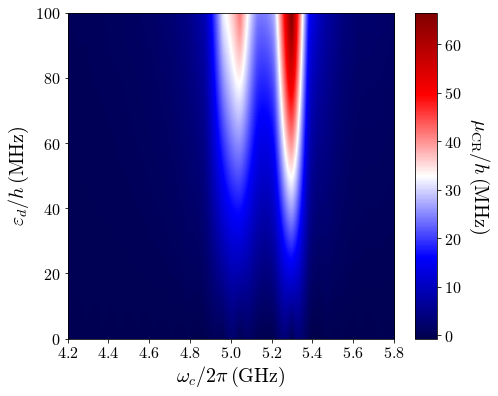

In [116]:
plot_cr_effect(result, save=True)